In [1]:
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl
from tqdm.notebook import tqdm

import os
import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from fitter import fitter
from detector import detector
from neutrino_source import neutrino_source

In [2]:
source = neutrino_source('Cr51', 1e5, [0.75], [0.9])
det = detector('nEXO')

det.position = (0, 0, 0)
dist = 0.1 # unit: m
source.position = (0, 0, -det.height/2-dist)

#det.baseline = np.sqrt((source.position[0]-det.position[0])**2 + (source.position[1]-det.position[1])**2 + (source.position[2]-det.position[2])**2 )
det.run_time = 100 # days

dm2 = 1 # unit: eV
sin2theta_square = 0.1

fit = fitter(source, det)

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [0.9] is created.


In [31]:
'''
pdf_filename = '../../jobs/PDFs/dm20.000_sin2thetasquare0.000_Ev750keV_dist10cm_3cmbin.p'
data_filename = '../../jobs/Datasets/nonoscillating_Enu750keV_dist10cm_3cmbin.p'

fit._set_datafilename(data_filename)
fit._set_pdffilename(pdf_filename)

fit.load_PDFs_fromFile()
fit.load_data_fromFile()

#fit.fit_statiscs_only_oneEvent(0)
N0s, chi20s = [], []
for i in tqdm(range(1000)):
    N0, chi20, _, _, _, _ = fit.fit_statiscs_only_oneEvent_manually(i, Nmin=100, Nmax=150)
    N0s.append(N0)
    chi20s.append(chi20)
arr = np.vstack((N0s, chi20s)).T

outputfile = '../../jobs/Fits/dm20.000_sin2thetasquare0.000_Ev750keV_dist10cm_3cmbin.txt'
np.savetxt(outputfile, arr) 
'''
    

for dm2 in np.logspace(-2, 1, 50):
    for sin2 in np.logspace(-2, 0, 50):
        pdf_filename = f'../../jobs/PDFs/dm2{dm2:.3f}_sin2thetasquare{sin2:.3f}_Ev750keV_dist10cm_3cmbin.p'
        data_filename = '../../jobs/Datasets/nonoscillating_Enu750keV_dist10cm_3cmbin.p'
        outputfile = f'../../jobs/Fits/dm2{dm2:.3f}_sin2thetasquare{sin2:.3f}_Ev750keV_dist10cm_3cmbin.txt'
        if os.path.exists(outputfile):
            continue

        fit._set_datafilename(data_filename)
        fit._set_pdffilename(pdf_filename)

        fit.load_PDFs_fromFile()
        fit.load_data_fromFile()

        #fit.fit_statiscs_only_oneEvent(0)
        N1s, chi21s = [], []
        for i in tqdm(range(1000)):
            N0, chi20, _, _, _, _ = fit.fit_statiscs_only_oneEvent_manually(i, Nmin=100, Nmax=150)
            N1s.append(N0)
            chi21s.append(chi20)

        arr = np.vstack((N1s, chi21s)).T
    
        np.savetxt(outputfile, arr) 





../../jobs/PDFs/dm20.095_sin2thetasquare0.105_Ev750keV_dist10cm_3cmbin.p does not exists.


  0%|          | 0/1000 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'values'

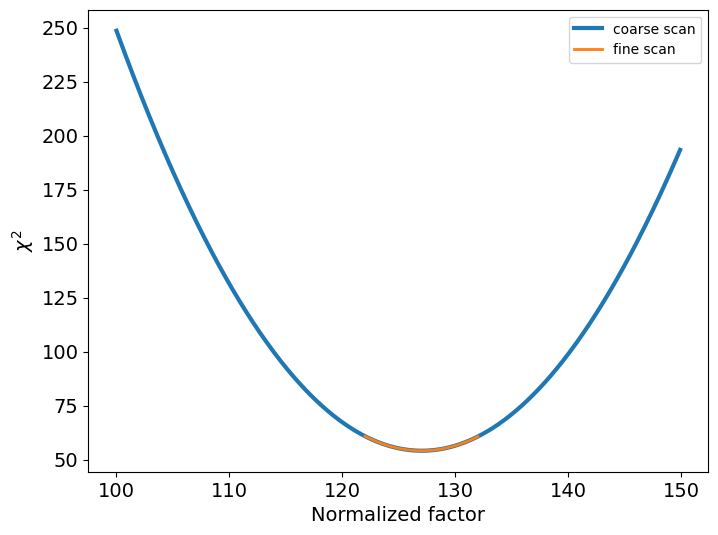

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(coarse_step, coarse_chi2, lw=3, label='coarse scan')
ax.plot(fine_step, fine_chi2, lw=2, label='fine scan')
ax.legend()
ax.set_xlabel('Normalized factor', fontsize=14)
ax.set_ylabel(r'$\chi^2$', fontsize=14)
ax.tick_params(labelsize=14)

(array([ 2.,  2.,  1.,  1.,  1.,  3.,  3.,  5.,  6.,  9., 12., 14., 15.,
        27., 21., 37., 53., 48., 67., 57., 52., 61., 57., 56., 43., 64.,
        45., 40., 37., 29., 34., 23., 13., 17., 14., 11.,  8.,  4.,  3.,
         1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 953.09534351,  959.76190939,  966.42847528,  973.09504116,
         979.76160705,  986.42817294,  993.09473882,  999.76130471,
        1006.42787059, 1013.09443648, 1019.76100237, 1026.42756825,
        1033.09413414, 1039.76070002, 1046.42726591, 1053.09383179,
        1059.76039768, 1066.42696357, 1073.09352945, 1079.76009534,
        1086.42666122, 1093.09322711, 1099.75979299, 1106.42635888,
        1113.09292477, 1119.75949065, 1126.42605654, 1133.09262242,
        1139.75918831, 1146.4257542 , 1153.09232008, 1159.75888597,
        1166.42545185, 1173.09201774, 1179.75858362, 1186.42514951,
        1193.0917154 , 1199.75828128, 1206.42484717, 1213.09141305,
        1219.75797894, 1226.42454483

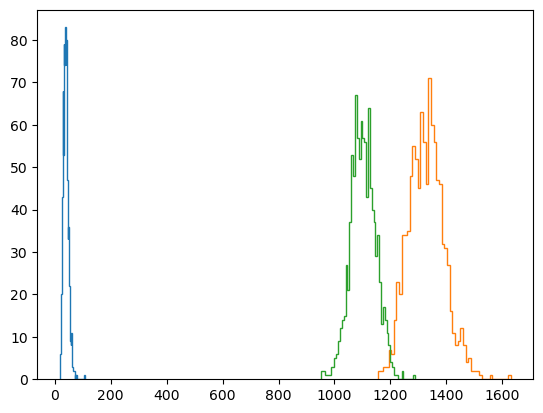

In [ ]:
plt.hist(chi20s,bins=50,histtype='step')
plt.hist(chi21s,bins=50,histtype='step')
plt.hist(chi22s,bins=50,histtype='step')

(array([318.,  19.,  27.,  33.,  28.,  27.,  35.,  37.,  23.,  34.,  20.,
         30.,  29.,  31.,  41.,  32.,  28.,  34.,  22.,  22.,  18.,  12.,
         12.,   8.,   9.,  11.,  12.,   8.,   2.,   6.,   3.,   2.,   3.,
         10.,   1.,   1.,   3.,   1.,   3.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 95.    ,  95.1078,  95.2156,  95.3234,  95.4312,  95.539 ,
         95.6468,  95.7546,  95.8624,  95.9702,  96.078 ,  96.1858,
         96.2936,  96.4014,  96.5092,  96.617 ,  96.7248,  96.8326,
         96.9404,  97.0482,  97.156 ,  97.2638,  97.3716,  97.4794,
         97.5872,  97.695 ,  97.8028,  97.9106,  98.0184,  98.1262,
         98.234 ,  98.3418,  98.4496,  98.5574,  98.6652,  98.773 ,
         98.8808,  98.9886,  99.0964,  99.2042,  99.312 ,  99.4198,
         99.5276,  99.6354,  99.7432,  99.851 ,  99.9588, 100.0666,
        100.1744, 100.2822, 100.39  ]),
 [<matplotlib.patches.Polygon at 0x15550cfa9700>])

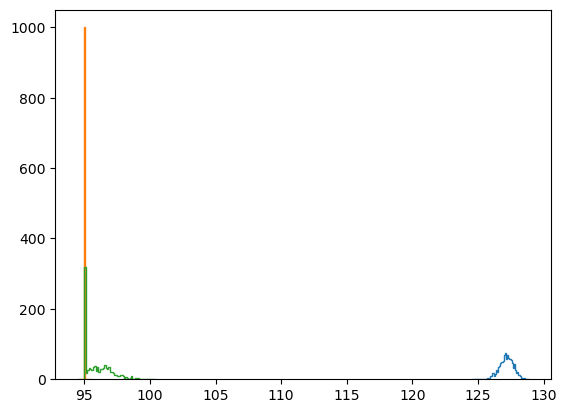

In [ ]:
plt.hist(N0s,bins=50,histtype='step')
plt.hist(N1s,bins=50,histtype='step')
plt.hist(N2s,bins=50,histtype='step')

In [4]:
fit.scale_count_flag = True
fit.MC_gen.n_events = 1e6

bls = []
for evno in tqdm(range(1000)):
    bl = fit.generate_dataset(dm2=0.0, sin2theta_square=0.0, Enu=0.75)
    bls.append(bl)

filename = '/p/lustre1/yu47/Sterile_Neutrino/jobs/Datasets/nonoscillating_Enu750keV_dist10cm_3cmbin_Nevt1e6.p'
fit.write_data_histo_intoFiles(bls, filename)


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 